# Install and Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import random
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Load data

In [48]:
df = pd.read_csv('/content/data (1).csv')
df.shape

(1470, 35)

In [4]:
df['MonthlyIncome'].min()

1009

In [49]:
df2 = pd.read_csv('/content/base_traduzida_3.csv', sep=';')
df2.shape

(1470, 17)

In [8]:
df2

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,2,2,5,6,11,5,4,8,8,6,11,1,5,6,77627114367
1,49,Não,3,3,5,5,10,6,7,1,10,4,23,8,7,10,10985367177
2,37,Sim,3,2,9,5,4,7,0,6,7,6,15,2,0,0,38458610573
3,33,Não,2,3,5,5,5,6,7,1,8,9,11,3,0,8,95259724396
4,27,Não,3,3,6,5,6,7,2,9,6,4,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,6,5,5,7,2,4,17,6,17,23,3,5,17870074039
1466,39,Não,3,3,6,5,19,9,7,4,9,4,15,6,7,7,1643457238
1467,27,Não,3,3,5,5,12,8,2,1,6,8,20,4,3,6,64590857558
1468,49,Não,3,3,6,6,10,5,6,2,17,8,14,2,8,9,880860641


In [50]:
df2['satisfacao_trabalho'] = df['JobSatisfaction']
df2['satisfacao_trabalho']

,satisfacao_trabalho
0,4
1,2
2,3
3,3
4,2
...,...
1465,4
1466,1
1467,2
1468,2


In [11]:
df2.rename(columns={
    "faixa_salarial_id":"salario"
}, inplace=True)
df2

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,salario,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,2,2,5,6,5993,5,4,8,8,6,11,1,5,6,77627114367
1,49,Não,3,3,5,5,5130,6,7,1,10,4,23,8,7,10,10985367177
2,37,Sim,3,2,9,5,2090,7,0,6,7,6,15,2,0,0,38458610573
3,33,Não,2,3,5,5,2909,6,7,1,8,9,11,3,0,8,95259724396
4,27,Não,3,3,6,5,3468,7,2,9,6,4,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,6,5,2571,7,2,4,17,6,17,23,3,5,17870074039
1466,39,Não,3,3,6,5,9991,9,7,4,9,4,15,6,7,7,1643457238
1467,27,Não,3,3,5,5,6142,8,2,1,6,8,20,4,3,6,64590857558
1468,49,Não,3,3,6,6,5390,5,6,2,17,8,14,2,8,9,880860641


In [51]:
df2.to_csv('base_traduzida_3.csv', sep=';', index=False)

# Descriptive Analysis

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
list_columns = df.columns
list_columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df1 = df.copy()

In [ ]:
df1.rename(columns={
    'Age': 'idade',
    'Attrition': 'evasao',
    'BusinessTravel': 'viagem_de_negocios',
    'DailyRate': 'taxa_diaria',
    'Department': 'departamento',
    'DistanceFromHome': 'distancia_de_casa',
    'Education': 'educacao',
    'EducationField': 'area_de_educacao',
    'EmployeeCount': 'contagem_de_funcionarios',
    'EmployeeNumber': 'numero_do_funcionario',
    'EnvironmentSatisfaction': 'satisfacao_com_o_ambiente',
    'Gender': 'genero',
    'HourlyRate': 'taxa_horaria',
    'JobInvolvement': 'envolvimento_no_trabalho',
    'JobLevel': 'nivel_do_trabalho',
    'JobRole': 'funcao_do_trabalho',
    'JobSatisfaction': 'satisfacao_no_trabalho',
    'MaritalStatus': 'estado_civil',
    'MonthlyIncome': 'renda_mensal',
    'MonthlyRate': 'taxa_mensal',
    'NumCompaniesWorked': 'numero_de_empresas_trabalhadas',
    'Over18': 'maior_de_18',
    'OverTime': 'horas_extras',
    'PercentSalaryHike': 'aumento_percentual_do_salario',
    'PerformanceRating': 'avaliacao_de_desempenho',
    'RelationshipSatisfaction': 'satisfacao_com_relacionamento',
    'StandardHours': 'horas_padrao',
    'StockOptionLevel': 'nivel_de_opcoes_de_acoes',
    'TotalWorkingYears': 'anos_totais_de_trabalho',
    'TrainingTimesLastYear': 'horas_de_treinamento_no_ultimo_ano',
    'WorkLifeBalance': 'equilibrio_trabalho_vida',
    'YearsAtCompany': 'anos_na_empresa',
    'YearsInCurrentRole': 'anos_na_funcao_atual',
    'YearsSinceLastPromotion': 'anos_desde_ultima_promocao',
    'YearsWithCurrManager': 'anos_com_o_atual_gestor'
}, inplace=True)

In [ ]:
df1

,idade,evasao,viagem_de_negocios,taxa_diaria,departamento,distancia_de_casa,educacao,area_de_educacao,contagem_de_funcionarios,numero_do_funcionario,satisfacao_com_o_ambiente,genero,taxa_horaria,envolvimento_no_trabalho,nivel_do_trabalho,funcao_do_trabalho,satisfacao_no_trabalho,estado_civil,renda_mensal,taxa_mensal,numero_de_empresas_trabalhadas,maior_de_18,horas_extras,aumento_percentual_do_salario,avaliacao_de_desempenho,satisfacao_com_relacionamento,horas_padrao,nivel_de_opcoes_de_acoes,anos_totais_de_trabalho,horas_de_treinamento_no_ultimo_ano,equilibrio_trabalho_vida,anos_na_empresa,anos_na_funcao_atual,anos_desde_ultima_promocao,anos_com_o_atual_gestor
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
bins = [0, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, float('inf')]

# Gerar os códigos em ordem crescente, 1, 2, 3, etc.
# len(bins) - 1 porque temos n-1 intervalos para n limites
codes = list(range(1, len(bins)))

# Criar a nova coluna de faixa salarial com códigos
df1['faixa_salarial_codigo'] = pd.cut(df1['renda_mensal'], bins=bins, labels=codes, right=False, include_lowest=True)
# Exibir o DataFrame atualizado
print(df1['faixa_salarial_codigo'])


0       11
1       10
2        4
3        5
4        6
        ..
1465     5
1466    19
1467    12
1468    10
1469     8
Name: faixa_salarial_codigo, Length: 1470, dtype: category
Categories (30, int64): [1 < 2 < 3 < 4 ... 27 < 28 < 29 < 30]


In [ ]:
df1

,idade,evasao,viagem_de_negocios,taxa_diaria,departamento,distancia_de_casa,educacao,area_de_educacao,contagem_de_funcionarios,numero_do_funcionario,satisfacao_com_o_ambiente,genero,taxa_horaria,envolvimento_no_trabalho,nivel_do_trabalho,funcao_do_trabalho,satisfacao_no_trabalho,estado_civil,renda_mensal,taxa_mensal,numero_de_empresas_trabalhadas,maior_de_18,horas_extras,aumento_percentual_do_salario,avaliacao_de_desempenho,satisfacao_com_relacionamento,horas_padrao,nivel_de_opcoes_de_acoes,anos_totais_de_trabalho,horas_de_treinamento_no_ultimo_ano,equilibrio_trabalho_vida,anos_na_empresa,anos_na_funcao_atual,anos_desde_ultima_promocao,anos_com_o_atual_gestor,faixa_salarial_codigo
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,11
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,4
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,5
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,5
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,19
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,12
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,10


In [ ]:
novo_df = df1[['idade', 'evasao', 'genero', 'estado_civil', 'area_de_educacao', 'departamento',
              'faixa_salarial_codigo', 'funcao_do_trabalho', 'anos_na_funcao_atual',
              'numero_de_empresas_trabalhadas', 'anos_totais_de_trabalho', 'educacao',
              'aumento_percentual_do_salario', 'distancia_de_casa', 'anos_com_o_atual_gestor', 'anos_na_empresa']]

Analyzing the data type of each feature is important to determine whether the data is qualitative or quantitative. It can be observed that all features are in the correct format. To facilitate exploratory analysis, the following variables will be converted to categorical: Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, and WorkLifeBalance.

In [ ]:
replacement_mapping = {
    'educacao': {1: 'Abaixo de Superior', 2: 'Superior', 3: 'Bacharelado', 4: 'Mestrado', 5: 'Doutorado'},
}

# Replacing values
novo_df[['educacao']] = novo_df[['educacao']].replace(replacement_mapping)

## Categorical features

In [ ]:
novo_df.describe(include=object).T

,count,unique,top,freq
evasao,1470,2,No,1233
genero,1470,2,Male,882
estado_civil,1470,3,Married,673
area_de_educacao,1470,6,Life Sciences,606
departamento,1470,3,Research & Development,961
funcao_do_trabalho,1470,9,Sales Executive,326
educacao,1470,5,Bacharelado,572


In [ ]:
novo_df['evasao'].value_counts()

,count
evasao,
No,1233
Yes,237


In [ ]:
novo_df['evasao'] = novo_df['evasao'].replace({'Yes': 'Sim', 'No': 'Não'})

In [ ]:
novo_df['genero'].value_counts()

,count
genero,
Male,882
Female,588


In [ ]:
novo_df['genero'] = novo_df['genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})

In [ ]:
novo_df['estado_civil'].value_counts()

,count
estado_civil,
Married,673
Single,470
Divorced,327


In [ ]:
novo_df['estado_civil'] = novo_df['estado_civil'].replace({'Married': 'Casado', 'Single': 'Solteiro', 'Divorced': 'Divorciado'})

In [ ]:
novo_df['area_de_educacao'].value_counts()

,count
area_de_educacao,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


In [ ]:
novo_df['area_de_educacao'] = novo_df['area_de_educacao'].replace({'Life Sciences': 'Ciencias da Vida', 'Medical': 'Saude', 'Marketing': 'Marketing', 'Technical Degree': 'TI', 'Other': 'Outros', 'Human Resources	': 'Recursos Humanos'})

In [ ]:
novo_df['departamento'].value_counts()

,count
departamento,
Research & Development,961
Sales,446
Human Resources,63


In [ ]:
novo_df['departamento'] = novo_df['departamento'].replace({'Research & Development': 'Pesquisa e Desenvolvimento', 'Sales': 'Vendas', 'Human Resources': 'RH'})

In [ ]:
novo_df['funcao_do_trabalho'].value_counts()

,count
funcao_do_trabalho,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [ ]:
novo_df['funcao_do_trabalho'] = novo_df['funcao_do_trabalho'].replace({'Sales Executive': 'Executivo de Vendas', 'Research Scientist': 'Pesquisador', 'Laboratory Technician': 'Tecnico Laboratorial', 'Manufacturing Director': 'Diretor de Manifaturacao', 'Healthcare Representative':'Representante de Saude', 'Manager':'Gerente', 'Sales Representative': 'Representante de Vendas', 'Research Director':'Diretor de Pesquisa' , 'Human Resources': 'Recursos Humanos' })

In [ ]:
novo_df['educacao'].value_counts()

,count
educacao,
Bacharelado,572
Mestrado,398
Superior,282
Abaixo de Superior,170
Doutorado,48


## Numerical features

In [ ]:
novo_df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
anos_na_funcao_atual,1470.0,4.229252,3.623137,0.0,2.0,3.0,7.0,18.0
numero_de_empresas_trabalhadas,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
anos_totais_de_trabalho,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
aumento_percentual_do_salario,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
distancia_de_casa,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
anos_com_o_atual_gestor,1470.0,4.123129,3.568136,0.0,2.0,3.0,7.0,17.0
anos_na_empresa,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


## Deleting unecessary columns

Some points can be observed in the numeric and categorical data:

- The minimum 'Age' of employees is 18, so the 'Over18' feature has a single value of Yes;
- For model training, the 'EmployeeNumber' feature representing the unique ID of the employee is not important;
- The 'EmployeeCount' feature has a single value with the count of employees, the same number of rows as the dataframe, and will not be used for analysis;
- The 'StandardHours' feature has a single value of 80 working hours for the entire dataset.

## NaN Analysis

In [ ]:
novo_df.isnull().sum()

,0
idade,0
evasao,0
genero,0
estado_civil,0
area_de_educacao,0
departamento,0
faixa_salarial_codigo,0
funcao_do_trabalho,0
anos_na_funcao_atual,0
numero_de_empresas_trabalhadas,0


## Duplicated values

In [ ]:
print('Total of duplicated values:', novo_df[novo_df.duplicated()].shape[0])

Total of duplicated values: 0


In [ ]:
novo_df.to_csv('dataframe_tradu.csv', index=False)

# Exploratory Data Analysis

## Distribution of target variable

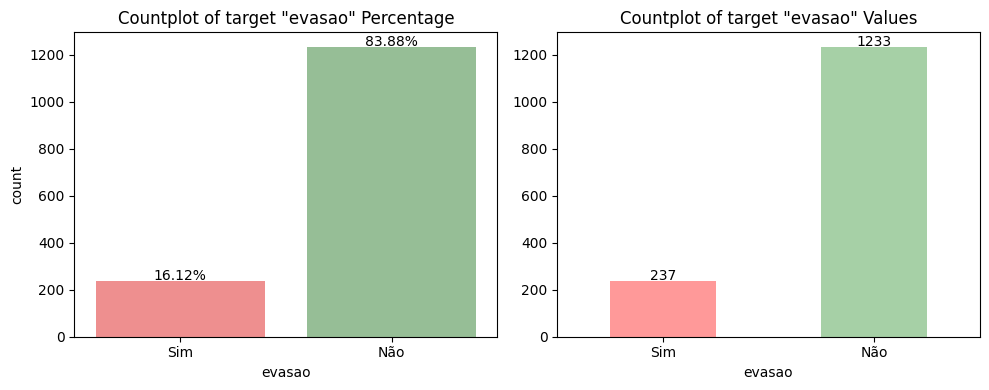

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Percentage target countplot
sns.countplot(x='evasao', data=novo_df, hue='evasao', palette={'Sim': 'red', 'Não': 'forestgreen'},alpha=0.5, ax=axs[0])

total = len(novo_df['evasao'])

for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}%'.format((height / total) * 100), ha="center")

axs[0].set_title('Countplot of target "evasao" Percentage')

# Target countplot
attrition_counts = novo_df['evasao'].value_counts().sort_index(ascending=False)
attrition_counts.plot(kind='bar', color=['red', 'forestgreen'], alpha=0.4, ax=axs[1])

for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 3), ha='center')

axs[1].set_title('Countplot of target "evasao" Values')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


Due to the imbalance in the target variable, it will be necessary to balance the data during the preprocessing phase using techniques such as SMOTE.

## Distribution of features

In [ ]:
numeric_columns = []
categorical_columns = []

for column in novo_df.columns:
    if novo_df[column].dtype in ['int64', 'float64']:
        numeric_columns.append(column)
    elif column != 'evasao':
        categorical_columns.append(column)

### Numerical

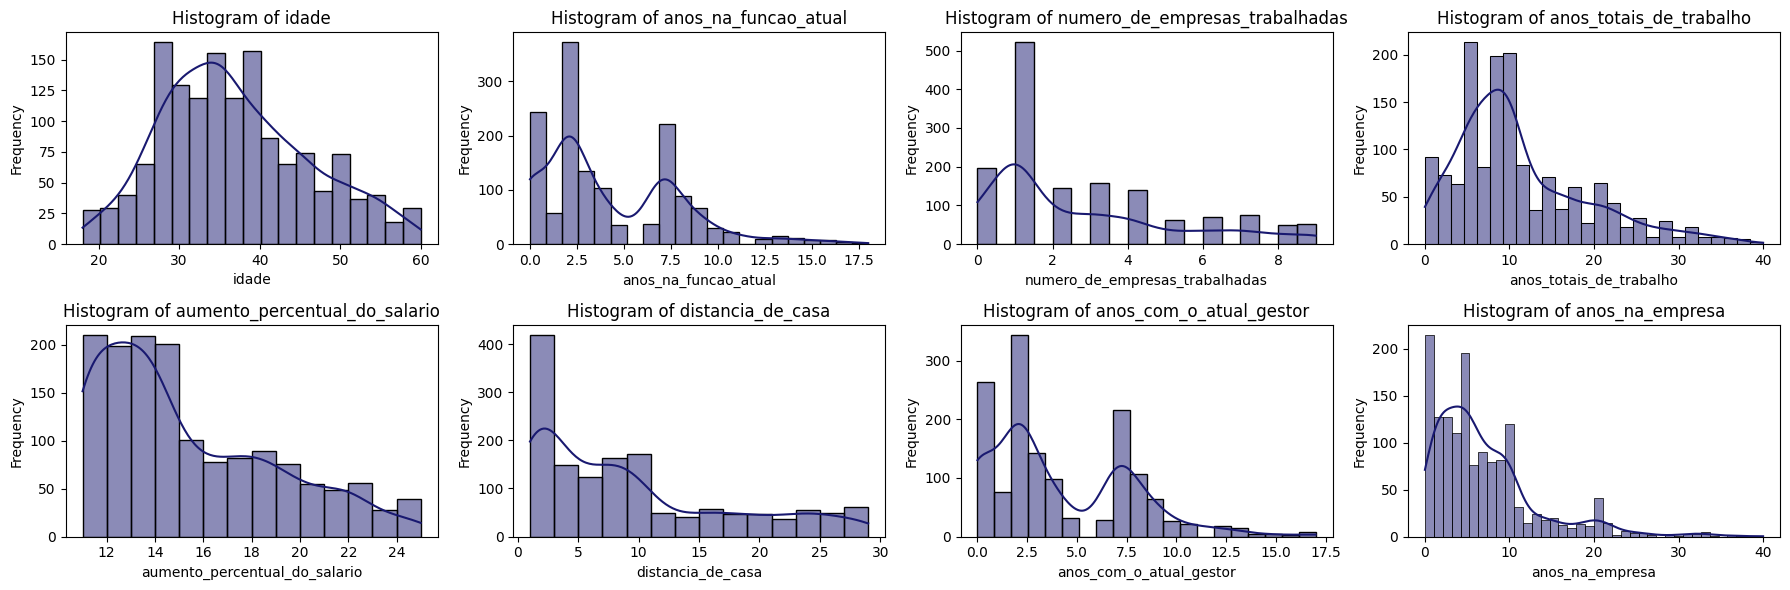

In [ ]:
num_plots_per_line = 4
num_lines = math.ceil(len(numeric_columns) / num_plots_per_line)
fig, axes = plt.subplots(num_lines, num_plots_per_line, figsize=(18, num_lines*3))
for i, column in enumerate(numeric_columns):
    row = i // num_plots_per_line
    col = i % num_plots_per_line
    sns.histplot(novo_df[column], kde=True, color='midnightblue', ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Based on the graphs above, it is evident that:

- The majority of individuals fall within the age group of 25-40.
- Nearly 50% of workers live within a short distance from the office, with a commute of less than or equal to 10 units.
- Income analysis reveals that 60% of individuals earn less than 10k.
- Around 40% of employees have worked for fewer than 1 company, suggesting they are relatively new to the workforce.
- About 30% of individuals have worked for more than 5 companies, indicating greater experience.
- Approximately 60% of workers have remained with the same company for 5 years or less.
- The vast majority (80%) of employees own either 1 or no stocks in the company

### Categorical

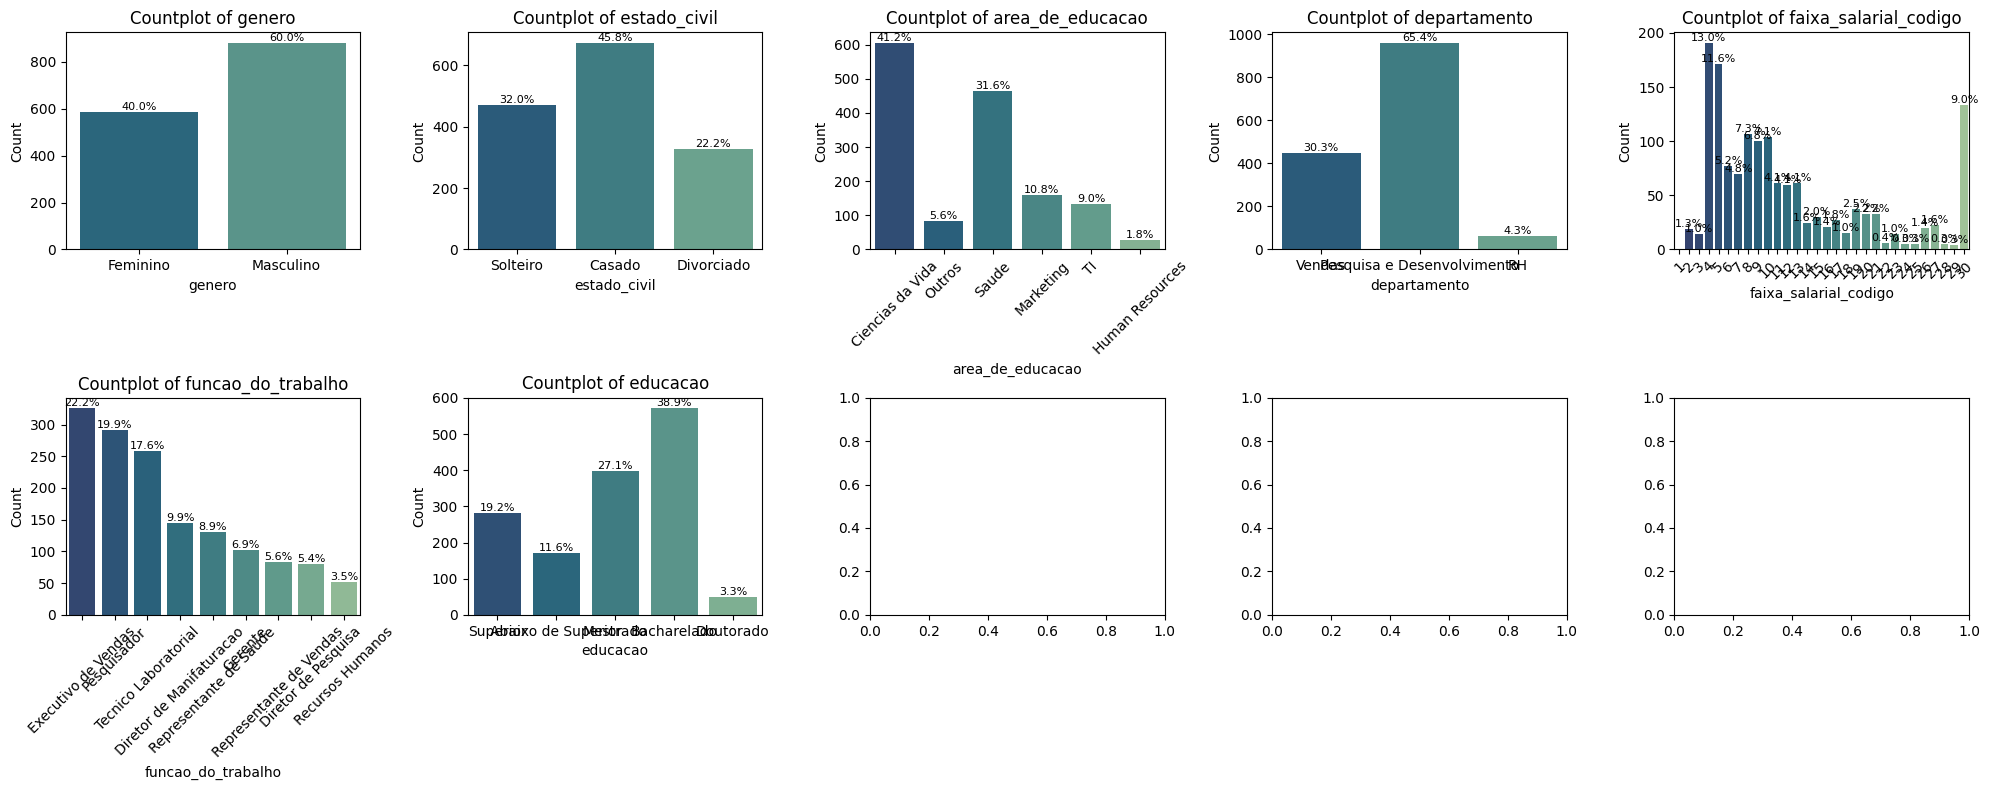

In [ ]:
num_plots_per_line_cat = 5
num_lines_cat = math.ceil(len(categorical_columns) / num_plots_per_line_cat)
fig, axes = plt.subplots(num_lines_cat, num_plots_per_line_cat, figsize=(20, num_lines_cat*4))
for i, column in enumerate(categorical_columns):
    row = i // num_plots_per_line_cat
    col = i % num_plots_per_line_cat
    sns.countplot(x=column, data=novo_df, ax=axes[row, col], palette='crest_r')
    axes[row, col].set_title(f'Countplot of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    if len(novo_df[column].unique()) > 5:
        axes[row, col].tick_params(axis='x', rotation=45)

    total = len(novo_df[column])
    for p in axes[row, col].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[row, col].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

Based on the graphs above, it is evident that:

- Approximately 70% of employees travel rarely, while 20% travel frequently, and the remaining do not travel.
- Over 70% of employees are part of the research and development department.
- More than 60% of individuals possess educational qualifications as Bachelors and Masters.
- The largest proportion (40%) of employees come from the life science field, followed by 30% from the medical field.
- Around 60% of employees are satisfied with the environmental conditions in the office, rating them above High on average.
- Satisfaction with the job is reported by over 60% of employees.
- Gender distribution is approximately 60% male and 40% female.
- A significant portion (60%) of individuals have partial involvement in their job responsibilities, while 20% have high involvement.
- Marriage status shows that 45% of respondents are married, 30% are single, and the remainder are divorced.
- The majority (80%) of employees receive average work ratings.

## Relationship between the target variable and some numerical features

### Attrition vs Monthly Income

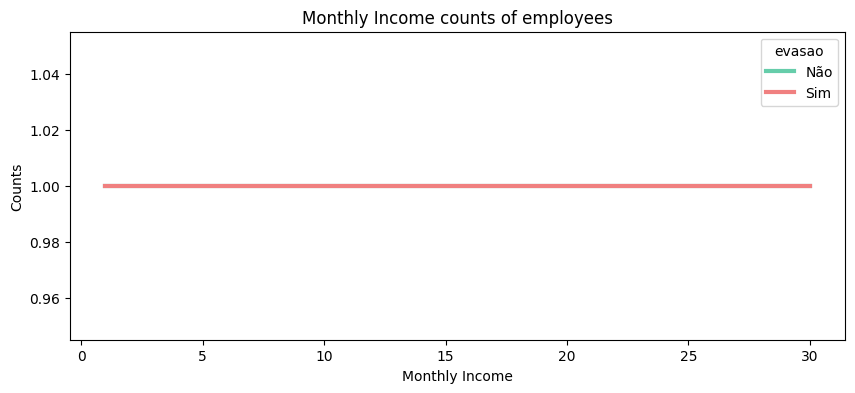

In [ ]:
mon_income_att_graph = novo_df.groupby(['faixa_salarial_codigo', 'evasao']).size().reset_index(name='Counts')

mon_income_att_graph['faixa_salarial_codigo'] = mon_income_att_graph['faixa_salarial_codigo']

mon_income_att_graph = mon_income_att_graph.groupby(['faixa_salarial_codigo', 'evasao']).size().reset_index(name='Counts')

plt.figure(figsize=(10, 4))
sns.lineplot(data=mon_income_att_graph, x='faixa_salarial_codigo', y='Counts', hue='evasao', palette={'Sim': 'lightcoral', 'Não': 'mediumaquamarine'}, linewidth=3)
plt.title('Monthly Income counts of employees')
plt.xlabel('Monthly Income')
plt.ylabel('Counts')
plt.show()

Based on the chart above, it is observed that the attrition rate is notably high at very low income levels, specifically less than 5k monthly. This decreases further, with a minor spike noticed around 10k, indicating a middle-class livelihood. Individuals in this income range tend to seek better standards of living and consequently move to different jobs. When the monthly income is relatively decent, the likelihood of an employee leaving the organization is low, as indicated by the flat line.

### Attrition vs Age

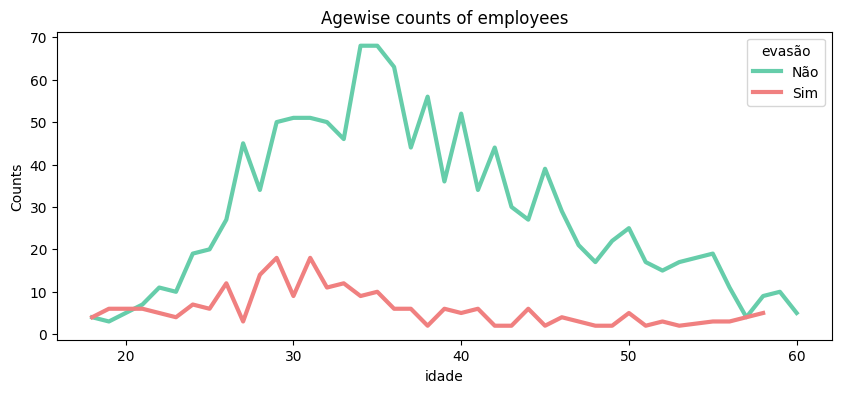

In [ ]:
age_att_graph = novo_df.groupby(['idade', 'evasao']).size().reset_index(name='Counts')

plt.figure(figsize=(10, 4))
sns.lineplot(data=age_att_graph, x='idade', y='Counts', hue='evasao', palette={'Sim': 'lightcoral', 'Não': 'mediumaquamarine'}, linewidth=3)
plt.title('Agewise counts of employees')
plt.xlabel('idade')
plt.ylabel('Counts')
plt.legend(title='evasão')
plt.show()

Based on the chart above, it is observed that the maximum attrition occurs between the age groups of 28-32. The attrition rate decreases with increasing age, as stability becomes a priority for individuals. Additionally, at a younger age, particularly from 18-20, the likelihood of employees leaving the organization is higher, as they are in an exploratory phase. It reaches a break-even point at the age of 21.

### Attrition vs Years In Current Role

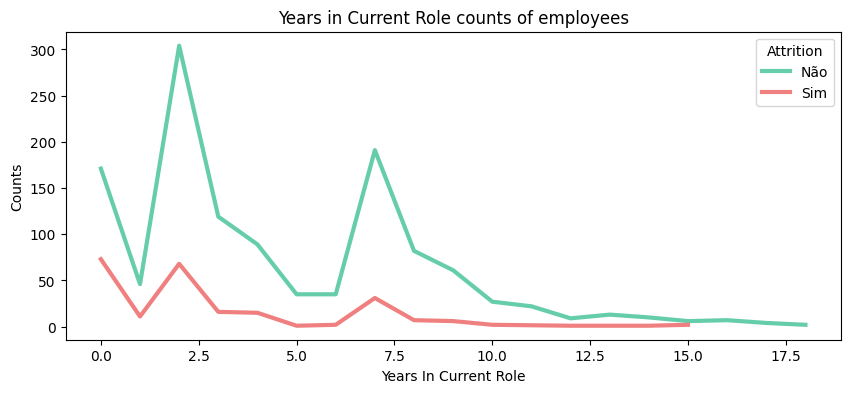

In [ ]:
years_curr_role_att_graph = novo_df.groupby(['anos_na_funcao_atual', 'evasao']).size().reset_index(name='Counts')

plt.figure(figsize=(10, 4))
sns.lineplot(data=years_curr_role_att_graph, x='anos_na_funcao_atual', y='Counts', hue='evasao', palette={'Sim': 'lightcoral', 'Não': 'mediumaquamarine'}, linewidth=3)
plt.title('Years in Current Role counts of employees')
plt.xlabel('Years In Current Role')
plt.ylabel('Counts')
plt.legend(title='Attrition')
plt.show()

Based on the graph above, it can be analyzed that people are more prone to leave the organization in the starting years of their role. Additionally, when individuals remain in the same role for an extended period, they tend to stay longer before moving into an upward role.

## Relationship between the target variable and some categorical features

### Attrition vs Work Life Balance

Based on the chart above, it is observed that individuals with lower levels of work-life balance have adapted to their jobs. Conversely, those with higher work-life balance scores tend to lean towards attrition. However, this trend diminishes when work-life balance is excellent, and individuals are satisfied with their work.

### Attrition vs Department

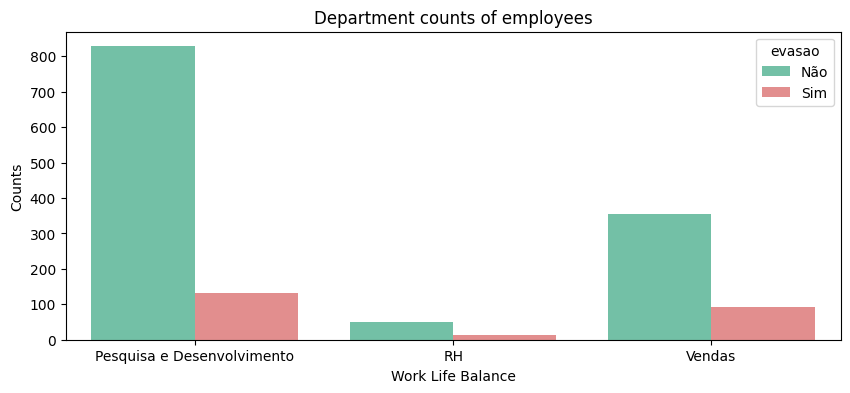

In [ ]:
department_att_graph = novo_df.groupby(['departamento', 'evasao'])['idade'].count().reset_index(name='Counts')

department_att_graph['percentual_de_evasao'] = department_att_graph.groupby('departamento')['Counts'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10, 4))
ax = sns.barplot(data=department_att_graph, x='departamento', y='Counts', hue='evasao', palette={'Sim': 'lightcoral', 'Não': 'mediumaquamarine'})

plt.title('Department counts of employees')
plt.ylabel('Counts')
plt.xlabel('Work Life Balance')
plt.show()

In [ ]:
department_att_graph_filtered = department_att_graph[['departamento', 'percentual_de_evasao']][department_att_graph['evasao'].eq('Sim')]

Based on the chart above, it is observed that the data contains only three major departments. The Sales department has the highest attrition rates (20%), followed by the Human Resource Department (19%). Conversely, the Research and Development department exhibits the lowest attrition rates, indicating stability and contentment within the department, as depicted in the chart above (13%).

# Predictive Model

## Encoding

### Ordinal features

In [ ]:
ordinal_categ = ['educacao']

le = LabelEncoder()
novo_df[ordinal_categ] = novo_df[ordinal_categ].apply(le.fit_transform)

### Nominal features

In [ ]:
novo_df = pd.get_dummies(data=novo_df, columns=['evasao','departamento','area_de_educacao','genero','funcao_do_trabalho','estado_civil'], drop_first=True)

# Rename columns name
rename_dummies_columns = {'Attrition_Yes': 'evasao', 'Gender_Male': 'genero'}

novo_df.rename(columns=rename_dummies_columns, inplace=True)

In [ ]:
novo_df

,idade,faixa_salarial_codigo,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,evasao_Sim,departamento_RH,departamento_Vendas,area_de_educacao_Human Resources,area_de_educacao_Marketing,area_de_educacao_Outros,area_de_educacao_Saude,area_de_educacao_TI,genero_Masculino,funcao_do_trabalho_Diretor de Pesquisa,funcao_do_trabalho_Executivo de Vendas,funcao_do_trabalho_Gerente,funcao_do_trabalho_Pesquisador,funcao_do_trabalho_Recursos Humanos,funcao_do_trabalho_Representante de Saude,funcao_do_trabalho_Representante de Vendas,funcao_do_trabalho_Tecnico Laboratorial,estado_civil_Divorciado,estado_civil_Solteiro
0,41,11,4,8,8,4,11,1,5,6,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,49,10,7,1,10,0,23,8,7,10,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,37,4,0,6,7,4,15,2,0,0,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True
3,33,5,7,1,8,3,11,3,0,8,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,27,6,2,9,6,0,12,2,2,2,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,5,2,4,17,4,17,23,3,5,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False
1466,39,19,7,4,9,0,15,6,7,7,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
1467,27,12,2,1,6,1,20,4,3,6,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1468,49,10,6,2,17,1,14,2,8,9,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False


### Deleting columns without value after training model

In [ ]:
novo_df = novo_df.drop(columns=['funcao_do_trabalho_Diretor de Pesquisa', 'funcao_do_trabalho_Gerente', 'funcao_do_trabalho_Recursos Humanos','funcao_do_trabalho_Tecnico Laboratorial','area_de_educacao_Marketing', 'area_de_educacao_Outros','funcao_do_trabalho_Representante de Vendas'])

## Train Test Split

In [ ]:
df_train_test = novo_df.sample(frac= 0.95, random_state=42)
df_validate = novo_df.drop(df_train_test.index)

df_train_test.reset_index(drop=True, inplace= True)
df_validate.reset_index(drop=True, inplace= True)

print('95% of data for modeling:', df_train_test.shape)
print('05% of data for validate:', df_validate.shape)

95% of data for modeling: (1396, 22)
05% of data for validate: (74, 22)


In [ ]:
X = df_train_test.drop(columns=['evasao_Sim'])
y = df_train_test['evasao_Sim']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1116, 21)
(1116,)
(280, 21)
(280,)


In [ ]:
X_train

,idade,faixa_salarial_codigo,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,departamento_RH,departamento_Vendas,area_de_educacao_Human Resources,area_de_educacao_Saude,area_de_educacao_TI,genero_Masculino,funcao_do_trabalho_Executivo de Vendas,funcao_do_trabalho_Pesquisador,funcao_do_trabalho_Representante de Saude,estado_civil_Divorciado,estado_civil_Solteiro
88,32,10,3,5,9,4,12,8,3,5,False,False,False,True,False,False,False,True,False,False,False
615,42,5,3,8,7,1,22,12,4,5,False,False,False,True,False,True,False,False,False,True,False
130,29,7,8,1,11,0,13,20,10,11,False,False,False,True,False,True,False,False,False,False,False
845,40,30,7,1,21,1,14,14,9,20,False,False,False,True,False,True,False,False,False,False,True
871,35,11,7,1,10,1,18,27,7,10,False,True,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,41,5,3,3,12,1,22,1,0,5,False,False,False,False,False,True,False,True,False,False,False
26,27,4,1,1,1,1,19,4,0,1,False,False,False,False,False,False,False,True,False,False,True
474,23,3,0,1,1,1,21,6,0,0,False,False,False,False,False,True,False,False,False,False,False
610,60,10,2,8,10,3,14,16,2,2,False,True,False,False,False,True,True,False,False,False,True


## Pipeline (Class balancing, Scaling, Cross-validating and Tune)

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVC', SVC(probability=True)),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('LGBM', LGBMClassifier(verbose=-1)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Define cross-validation metrics
cross_val_metrics = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']

# List to store results
results = []

# Dictionary to store best estimators
best_estimators = {}

# Define StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the models
for name, model in models:
    # Define the pipeline
    pipeline = imbpipeline(steps=[
        ['nearmiss', NearMiss()],
        ['scaler', StandardScaler()],
        ['classifier', model]
    ])

    # Define the parameter grid specific to each model
    if name == 'Logistic Regression':
        param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                      'classifier__max_iter': [100, 300, 500, 1000],
                      'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                      'classifier__solver': ['lbfgs','newton-cg','liblinear','sag','saga']}
    elif name == 'SVC':
        param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100],
                      'classifier__kernel': ['linear', 'rbf']}
    elif name == 'K-Nearest Neighbors':
        param_grid = {'classifier__n_neighbors': [3, 5, 7, 9]}
    elif name == 'Decision Tree':
        param_grid = {'classifier__max_depth': [None, 5, 10]}
    elif name == 'Random Forest':
        param_grid = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__max_depth': [None, 5, 10]}
    elif name == 'Gradient Boosting':
        param_grid = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__learning_rate': [0.01, 0.1, 0.2],
                      'classifier__max_depth': [3, 5, 7]}
    elif name == 'LGBM':
        param_grid = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__learning_rate': [0.01, 0.1, 0.2],
                      'classifier__max_depth': [3, 5, 7]}
    elif name == 'XGBoost':
        param_grid = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__learning_rate': [0.01, 0.1, 0.2],
                      'classifier__max_depth': [3, 5, 7]}
    else:
        param_grid = {}

    # Create the GridSearchCV with refit on 'recall'
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               scoring=cross_val_metrics,
                               refit='recall',
                               cv=stratified_kfold,
                               n_jobs=-1)

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Save the best estimator for the current model
    best_estimators[name] = grid_search.best_estimator_['classifier']

    # Evaluate the best model on the test set for all metrics
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

    test_scores = {
        'accuracy': round(accuracy_score(y_test, y_pred), 3),
        'precision': round(precision_score(y_test, y_pred), 3),
        'recall': round(recall_score(y_test, y_pred), 3),
        'f1': round(f1_score(y_test, y_pred), 3),
        'roc_auc': round(roc_auc_score(y_test, y_pred_proba), 3)
    }

    # Add results to the DataFrame
    results.append({
        'model': name,
        **test_scores
    })

## Evaluation

In [ ]:
df_model_comparison = pd.DataFrame(results)

df_model_comparison.sort_values(by='recall',ascending=False)

,model,accuracy,precision,recall,f1,roc_auc
1,SVC,0.457,0.190,0.750,0.303,0.549
5,Random Forest,0.396,0.166,0.705,0.268,0.481
7,LGBM,0.379,0.161,0.705,0.263,0.451
8,XGBoost,0.393,0.161,0.682,0.261,0.457
4,Decision Tree,0.404,0.160,0.659,0.258,0.508
6,Gradient Boosting,0.386,0.156,0.659,0.252,0.480
3,K-Nearest Neighbors,0.518,0.177,0.568,0.270,0.529
2,Naive Bayes,0.386,0.136,0.545,0.218,0.410
0,Logistic Regression,0.843,0.000,0.000,0.000,0.500


In [ ]:
best_model = best_estimators['Random Forest']
print(best_model)

RandomForestClassifier(max_depth=10, n_estimators=50)


In [ ]:
final_pipeline = imbpipeline(steps=[
                            ['nearmiss', NearMiss()],
                            ['scaler', StandardScaler()],
                            ['classifier', best_model]
                    ])

final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)
y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.33      0.48       236
        True       0.17      0.75      0.28        44

    accuracy                           0.40       280
   macro avg       0.52      0.54      0.38       280
weighted avg       0.77      0.40      0.45       280



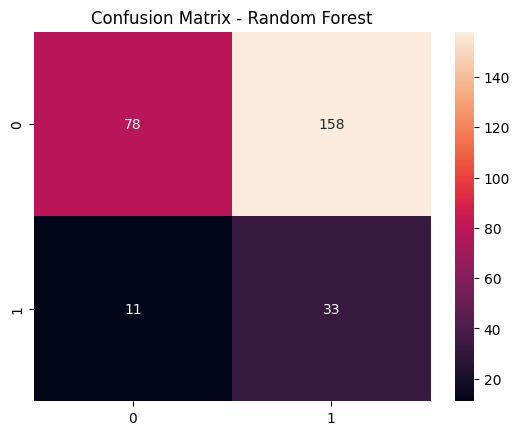

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.title('Confusion Matrix - Random Forest');

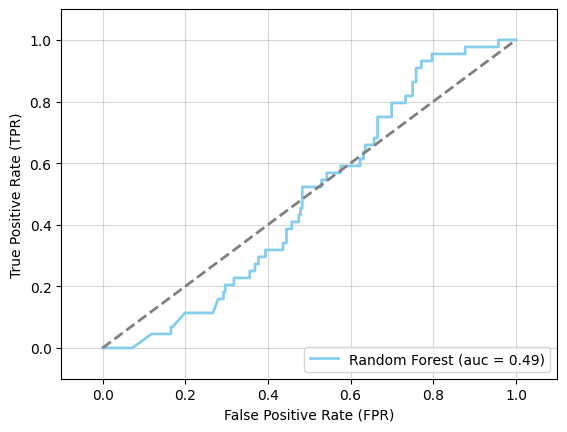

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'Random Forest (auc = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

### Feature Importance

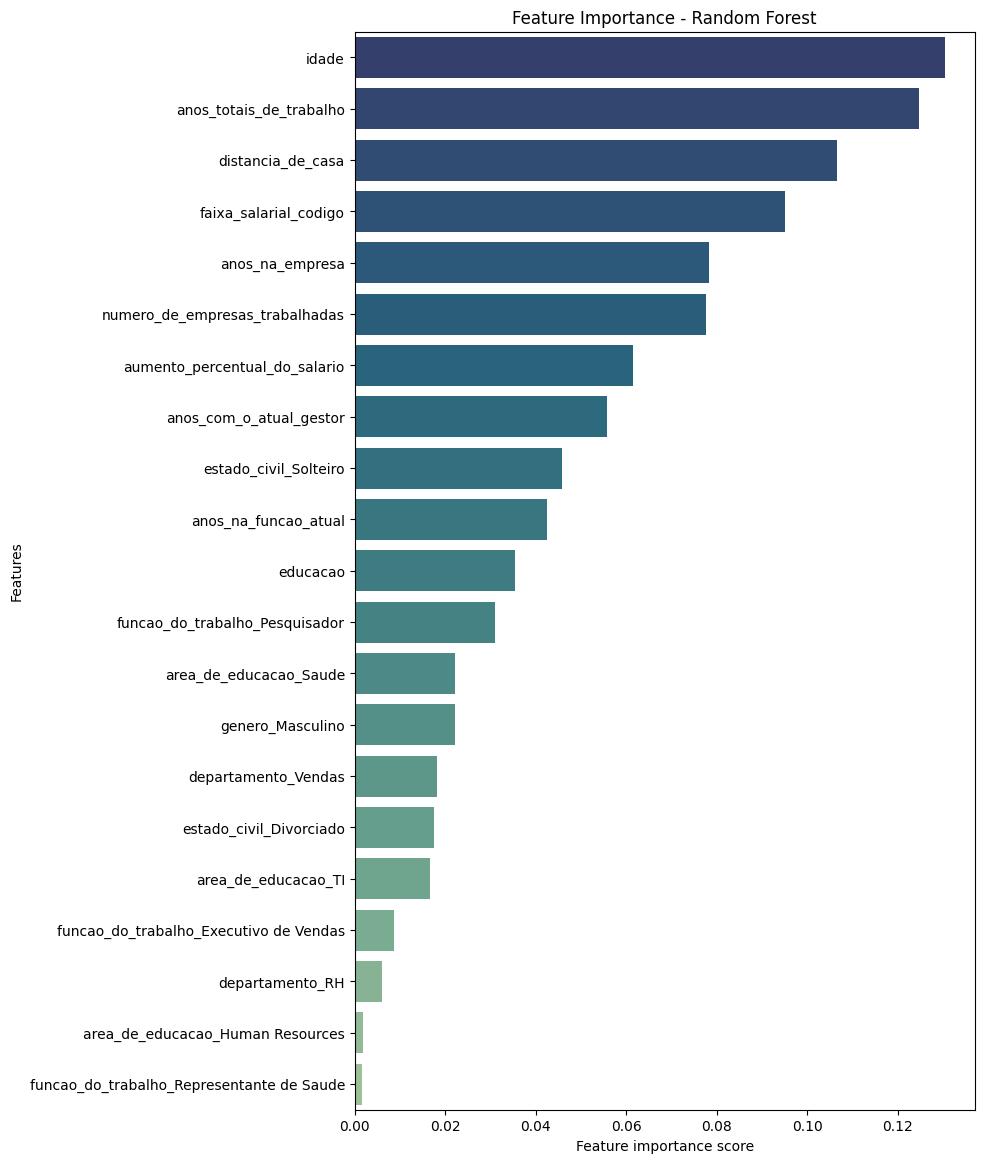

In [ ]:
feature_scores = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(8, 14))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, palette='crest_r')
ax.set_title("Feature Importance - Random Forest")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
df_tradu = pd.read_csv('/content/dataframe_tradu.csv')
df_tradu.shape

(1470, 16)

In [ ]:
df_tradu

,idade,evasao,genero,estado_civil,area_de_educacao,departamento,faixa_salarial_codigo,funcao_do_trabalho,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa
0,41,Sim,Feminino,Solteiro,Ciencias da Vida,Vendas,11,Executivo de Vendas,4,8,8,Superior,11,1,5,6
1,49,Não,Masculino,Casado,Ciencias da Vida,Pesquisa e Desenvolvimento,10,Pesquisador,7,1,10,Abaixo de Superior,23,8,7,10
2,37,Sim,Masculino,Solteiro,Outros,Pesquisa e Desenvolvimento,4,Tecnico Laboratorial,0,6,7,Superior,15,2,0,0
3,33,Não,Feminino,Casado,Ciencias da Vida,Pesquisa e Desenvolvimento,5,Pesquisador,7,1,8,Mestrado,11,3,0,8
4,27,Não,Masculino,Casado,Saude,Pesquisa e Desenvolvimento,6,Tecnico Laboratorial,2,9,6,Abaixo de Superior,12,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,Masculino,Casado,Saude,Pesquisa e Desenvolvimento,5,Tecnico Laboratorial,2,4,17,Superior,17,23,3,5
1466,39,Não,Masculino,Casado,Saude,Pesquisa e Desenvolvimento,19,Representante de Saude,7,4,9,Abaixo de Superior,15,6,7,7
1467,27,Não,Masculino,Casado,Ciencias da Vida,Pesquisa e Desenvolvimento,12,Diretor de Manifaturacao,2,1,6,Bacharelado,20,4,3,6
1468,49,Não,Masculino,Casado,Saude,Vendas,10,Executivo de Vendas,6,2,17,Bacharelado,14,2,8,9


In [ ]:
df_tradu_cpf['area_de_educacao'].value_counts()

NameError: name 'df_tradu_cpf' is not defined

In [ ]:
arquivo_csv_entrada = '/content/dataframe_tradu.csv'
arquivo_csv_saida = 'seu_arquivo_com_cpf.csv'

# Abre o arquivo CSV de entrada
with open(arquivo_csv_entrada, mode='r') as entrada_csv:
    leitor_csv = list(csv.reader(entrada_csv))
    cabecalho = leitor_csv[0]  # Primeira linha é o cabeçalho

    # Adiciona a nova coluna de CPF no cabeçalho
    cabecalho.append('cpf')

    # Abre o arquivo CSV de saída
    with open(arquivo_csv_saida, mode='w', newline='') as saida_csv:
        escritor_csv = csv.writer(saida_csv)
        escritor_csv.writerow(cabecalho)  # Escreve o novo cabeçalho

        # Processa as linhas e adiciona um CPF aleatório em cada uma
        for linha in leitor_csv[1:]:
            # Gera um CPF aleatório de 11 dígitos
            cpf = ''.join([str(random.randint(0, 9)) for _ in range(11)])
            linha.append(cpf)  # Adiciona o CPF à linha
            escritor_csv.writerow(linha)  # Escreve a linha no arquivo de saída


In [ ]:
df_tradu_cpf = pd.read_csv('/content/seu_arquivo_com_cpf.csv')
df_tradu_cpf

,idade,evasao,genero,estado_civil,area_de_educacao,departamento,faixa_salarial_codigo,funcao_do_trabalho,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,Feminino,Solteiro,Ciencias da Vida,Vendas,11,Executivo de Vendas,4,8,8,Superior,11,1,5,6,77627114367
1,49,Não,Masculino,Casado,Ciencias da Vida,Pesquisa e Desenvolvimento,10,Pesquisador,7,1,10,Abaixo de Superior,23,8,7,10,10985367177
2,37,Sim,Masculino,Solteiro,Outros,Pesquisa e Desenvolvimento,4,Tecnico Laboratorial,0,6,7,Superior,15,2,0,0,38458610573
3,33,Não,Feminino,Casado,Ciencias da Vida,Pesquisa e Desenvolvimento,5,Pesquisador,7,1,8,Mestrado,11,3,0,8,95259724396
4,27,Não,Masculino,Casado,Saude,Pesquisa e Desenvolvimento,6,Tecnico Laboratorial,2,9,6,Abaixo de Superior,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,Masculino,Casado,Saude,Pesquisa e Desenvolvimento,5,Tecnico Laboratorial,2,4,17,Superior,17,23,3,5,17870074039
1466,39,Não,Masculino,Casado,Saude,Pesquisa e Desenvolvimento,19,Representante de Saude,7,4,9,Abaixo de Superior,15,6,7,7,1643457238
1467,27,Não,Masculino,Casado,Ciencias da Vida,Pesquisa e Desenvolvimento,12,Diretor de Manifaturacao,2,1,6,Bacharelado,20,4,3,6,64590857558
1468,49,Não,Masculino,Casado,Saude,Vendas,10,Executivo de Vendas,6,2,17,Bacharelado,14,2,8,9,880860641


In [ ]:
replacement_mapping = {
    'genero': {'Feminino': 0, 'Masculino': 1},
}

# Replacing values
df_tradu_cpf[['genero']] = df_tradu_cpf[['genero']].replace(replacement_mapping)
df_tradu_cpf

,idade,evasao,genero,estado_civil,area_de_educacao,departamento,faixa_salarial_codigo,funcao_do_trabalho,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,0,Solteiro,Ciencias da Vida,Vendas,11,Executivo de Vendas,4,8,8,Superior,11,1,5,6,77627114367
1,49,Não,1,Casado,Ciencias da Vida,Pesquisa e Desenvolvimento,10,Pesquisador,7,1,10,Abaixo de Superior,23,8,7,10,10985367177
2,37,Sim,1,Solteiro,Outros,Pesquisa e Desenvolvimento,4,Tecnico Laboratorial,0,6,7,Superior,15,2,0,0,38458610573
3,33,Não,0,Casado,Ciencias da Vida,Pesquisa e Desenvolvimento,5,Pesquisador,7,1,8,Mestrado,11,3,0,8,95259724396
4,27,Não,1,Casado,Saude,Pesquisa e Desenvolvimento,6,Tecnico Laboratorial,2,9,6,Abaixo de Superior,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,1,Casado,Saude,Pesquisa e Desenvolvimento,5,Tecnico Laboratorial,2,4,17,Superior,17,23,3,5,17870074039
1466,39,Não,1,Casado,Saude,Pesquisa e Desenvolvimento,19,Representante de Saude,7,4,9,Abaixo de Superior,15,6,7,7,1643457238
1467,27,Não,1,Casado,Ciencias da Vida,Pesquisa e Desenvolvimento,12,Diretor de Manifaturacao,2,1,6,Bacharelado,20,4,3,6,64590857558
1468,49,Não,1,Casado,Saude,Vendas,10,Executivo de Vendas,6,2,17,Bacharelado,14,2,8,9,880860641


In [ ]:
replacement_mapping = {
    'estado_civil': {'Solteiro': 0, 'Divorciado': 1, 'Casado': 2},
}

# Replacing values
df_tradu_cpf[['estado_civil']] = df_tradu_cpf[['estado_civil']].replace(replacement_mapping)
df_tradu_cpf

,idade,evasao,genero,estado_civil,area_de_educacao,departamento,faixa_salarial_codigo,funcao_do_trabalho,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,0,0,Ciencias da Vida,Vendas,11,Executivo de Vendas,4,8,8,Superior,11,1,5,6,77627114367
1,49,Não,1,2,Ciencias da Vida,Pesquisa e Desenvolvimento,10,Pesquisador,7,1,10,Abaixo de Superior,23,8,7,10,10985367177
2,37,Sim,1,0,Outros,Pesquisa e Desenvolvimento,4,Tecnico Laboratorial,0,6,7,Superior,15,2,0,0,38458610573
3,33,Não,0,2,Ciencias da Vida,Pesquisa e Desenvolvimento,5,Pesquisador,7,1,8,Mestrado,11,3,0,8,95259724396
4,27,Não,1,2,Saude,Pesquisa e Desenvolvimento,6,Tecnico Laboratorial,2,9,6,Abaixo de Superior,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,1,2,Saude,Pesquisa e Desenvolvimento,5,Tecnico Laboratorial,2,4,17,Superior,17,23,3,5,17870074039
1466,39,Não,1,2,Saude,Pesquisa e Desenvolvimento,19,Representante de Saude,7,4,9,Abaixo de Superior,15,6,7,7,1643457238
1467,27,Não,1,2,Ciencias da Vida,Pesquisa e Desenvolvimento,12,Diretor de Manifaturacao,2,1,6,Bacharelado,20,4,3,6,64590857558
1468,49,Não,1,2,Saude,Vendas,10,Executivo de Vendas,6,2,17,Bacharelado,14,2,8,9,880860641


In [ ]:
replacement_mapping = {
    'area_de_educacao': {'Ciencias da Vida': 0, 'Saude': 1, 'Marketing': 2, 'TI': 3, 'Outros': 4, 'Human Resources': 5},
}

# Replacing values
df_tradu_cpf[['area_de_educacao']] = df_tradu_cpf[['area_de_educacao']].replace(replacement_mapping)
df_tradu_cpf

,idade,evasao,genero,estado_civil,area_de_educacao,departamento,faixa_salarial_codigo,funcao_do_trabalho,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,0,0,0,Vendas,11,Executivo de Vendas,4,8,8,Superior,11,1,5,6,77627114367
1,49,Não,1,2,0,Pesquisa e Desenvolvimento,10,Pesquisador,7,1,10,Abaixo de Superior,23,8,7,10,10985367177
2,37,Sim,1,0,4,Pesquisa e Desenvolvimento,4,Tecnico Laboratorial,0,6,7,Superior,15,2,0,0,38458610573
3,33,Não,0,2,0,Pesquisa e Desenvolvimento,5,Pesquisador,7,1,8,Mestrado,11,3,0,8,95259724396
4,27,Não,1,2,1,Pesquisa e Desenvolvimento,6,Tecnico Laboratorial,2,9,6,Abaixo de Superior,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,1,2,1,Pesquisa e Desenvolvimento,5,Tecnico Laboratorial,2,4,17,Superior,17,23,3,5,17870074039
1466,39,Não,1,2,1,Pesquisa e Desenvolvimento,19,Representante de Saude,7,4,9,Abaixo de Superior,15,6,7,7,1643457238
1467,27,Não,1,2,0,Pesquisa e Desenvolvimento,12,Diretor de Manifaturacao,2,1,6,Bacharelado,20,4,3,6,64590857558
1468,49,Não,1,2,1,Vendas,10,Executivo de Vendas,6,2,17,Bacharelado,14,2,8,9,880860641


In [ ]:
df_tradu_cpf['area_de_educacao'].value_counts()

,count
area_de_educacao,
0,606
1,464
2,159
3,132
4,82
5,27


In [ ]:
df_tradu_cpf['educacao'].value_counts()

,count
educacao,
Bacharelado,572
Mestrado,398
Superior,282
Abaixo de Superior,170
Doutorado,48


In [ ]:
replacement_mapping = {
    'educacao': {'Bacharelado': 0, 'Mestrado': 1, 'Superior': 2, 'Abaixo de Superior': 3, 'Doutorado': 4},
}

# Replacing values
df_tradu_cpf[['educacao']] = df_tradu_cpf[['educacao']].replace(replacement_mapping)
df_tradu_cpf

,idade,evasao,genero,estado_civil,area_de_educacao,departamento,faixa_salarial_codigo,funcao_do_trabalho,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,0,0,0,Vendas,11,Executivo de Vendas,4,8,8,2,11,1,5,6,77627114367
1,49,Não,1,2,0,Pesquisa e Desenvolvimento,10,Pesquisador,7,1,10,3,23,8,7,10,10985367177
2,37,Sim,1,0,4,Pesquisa e Desenvolvimento,4,Tecnico Laboratorial,0,6,7,2,15,2,0,0,38458610573
3,33,Não,0,2,0,Pesquisa e Desenvolvimento,5,Pesquisador,7,1,8,1,11,3,0,8,95259724396
4,27,Não,1,2,1,Pesquisa e Desenvolvimento,6,Tecnico Laboratorial,2,9,6,3,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,1,2,1,Pesquisa e Desenvolvimento,5,Tecnico Laboratorial,2,4,17,2,17,23,3,5,17870074039
1466,39,Não,1,2,1,Pesquisa e Desenvolvimento,19,Representante de Saude,7,4,9,3,15,6,7,7,1643457238
1467,27,Não,1,2,0,Pesquisa e Desenvolvimento,12,Diretor de Manifaturacao,2,1,6,0,20,4,3,6,64590857558
1468,49,Não,1,2,1,Vendas,10,Executivo de Vendas,6,2,17,0,14,2,8,9,880860641


In [ ]:
df_tradu_cpf['departamento'].value_counts()

,count
departamento,
Pesquisa e Desenvolvimento,961
Vendas,446
RH,63


In [ ]:
replacement_mapping = {
    'departamento': {'Pesquisa e Desenvolvimento': 0, 'Vendas': 1, 'RH': 2},
}

# Replacing values
df_tradu_cpf[['departamento']] = df_tradu_cpf[['departamento']].replace(replacement_mapping)
df_tradu_cpf

,idade,evasao,genero,estado_civil,area_de_educacao,departamento,faixa_salarial_codigo,funcao_do_trabalho,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,0,0,0,1,11,Executivo de Vendas,4,8,8,2,11,1,5,6,77627114367
1,49,Não,1,2,0,0,10,Pesquisador,7,1,10,3,23,8,7,10,10985367177
2,37,Sim,1,0,4,0,4,Tecnico Laboratorial,0,6,7,2,15,2,0,0,38458610573
3,33,Não,0,2,0,0,5,Pesquisador,7,1,8,1,11,3,0,8,95259724396
4,27,Não,1,2,1,0,6,Tecnico Laboratorial,2,9,6,3,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,1,2,1,0,5,Tecnico Laboratorial,2,4,17,2,17,23,3,5,17870074039
1466,39,Não,1,2,1,0,19,Representante de Saude,7,4,9,3,15,6,7,7,1643457238
1467,27,Não,1,2,0,0,12,Diretor de Manifaturacao,2,1,6,0,20,4,3,6,64590857558
1468,49,Não,1,2,1,1,10,Executivo de Vendas,6,2,17,0,14,2,8,9,880860641


In [ ]:
df_tradu_cpf['funcao_do_trabalho'].value_counts()

,count
funcao_do_trabalho,
Executivo de Vendas,326
Pesquisador,292
Tecnico Laboratorial,259
Diretor de Manifaturacao,145
Representante de Saude,131
Gerente,102
Representante de Vendas,83
Diretor de Pesquisa,80
Recursos Humanos,52


In [ ]:
replacement_mapping = {
    'funcao_do_trabalho': {'Executivo de Vendas': 0, 'Pesquisador': 1, 'Tecnico Laboratorial': 2, 'Diretor de Manifaturacao': 3, 'Representante de Saude': 4, 'Gerente': 5, 'Representante de Vendas': 6, 'Diretor de Pesquisa': 7, 'Recursos Humanos': 8},
}

# Replacing values
df_tradu_cpf[['funcao_do_trabalho']] = df_tradu_cpf[['funcao_do_trabalho']].replace(replacement_mapping)
df_tradu_cpf

,idade,evasao,genero,estado_civil,area_de_educacao,departamento,faixa_salarial_codigo,funcao_do_trabalho,anos_na_funcao_atual,numero_de_empresas_trabalhadas,anos_totais_de_trabalho,educacao,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,0,0,0,1,11,0,4,8,8,2,11,1,5,6,77627114367
1,49,Não,1,2,0,0,10,1,7,1,10,3,23,8,7,10,10985367177
2,37,Sim,1,0,4,0,4,2,0,6,7,2,15,2,0,0,38458610573
3,33,Não,0,2,0,0,5,1,7,1,8,1,11,3,0,8,95259724396
4,27,Não,1,2,1,0,6,2,2,9,6,3,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,1,2,1,0,5,2,2,4,17,2,17,23,3,5,17870074039
1466,39,Não,1,2,1,0,19,4,7,4,9,3,15,6,7,7,1643457238
1467,27,Não,1,2,0,0,12,3,2,1,6,0,20,4,3,6,64590857558
1468,49,Não,1,2,1,1,10,0,6,2,17,0,14,2,8,9,880860641


In [ ]:
df_tradu_cpf.rename(columns={
    'genero':'genero_id',
    'estado_civil': 'estado_civil_id',
    'area_de_educacao': 'formacao_id',
    'educacao': 'faculdade_id',
    'funcao_do_trabalho': 'cargo_id',
    'departamento': 'departamento_id',
    'faixa_salarial_codigo': 'faixa_salarial_id',
    'funcao_do_trabalho': 'cargo_id',
    'anos_na_funcao_atual': 'tempo_trabalho',
    'numero_de_empresas_trabalhadas': 'quantidade_empresas_trabalhou',
    'anos_totais_de_trabalho': 'quantidade_anos_trabalhados_anteriormente',
    'aumento_percentual_do_salario': 'aumento_percentual_do_salario',
    'distancia_de_casa': 'distancia_de_casa',
    'anos_com_o_atual_gestor': 'anos_com_o_atual_gestor',
    'anos_na_empresa': 'anos_na_empresa'


}, inplace=True)
df_tradu_cpf

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,faculdade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,0,0,0,1,11,0,4,8,8,2,11,1,5,6,77627114367
1,49,Não,1,2,0,0,10,1,7,1,10,3,23,8,7,10,10985367177
2,37,Sim,1,0,4,0,4,2,0,6,7,2,15,2,0,0,38458610573
3,33,Não,0,2,0,0,5,1,7,1,8,1,11,3,0,8,95259724396
4,27,Não,1,2,1,0,6,2,2,9,6,3,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,1,2,1,0,5,2,2,4,17,2,17,23,3,5,17870074039
1466,39,Não,1,2,1,0,19,4,7,4,9,3,15,6,7,7,1643457238
1467,27,Não,1,2,0,0,12,3,2,1,6,0,20,4,3,6,64590857558
1468,49,Não,1,2,1,1,10,0,6,2,17,0,14,2,8,9,880860641


In [ ]:
df_tradu_cpf.to_csv('base_traduzida.csv', sep=';', index=False)

In [ ]:
df = pd.read_csv('/content/base_traduzida.csv', sep=';')
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,faculdade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,0,0,0,1,11,0,4,8,8,2,11,1,5,6,77627114367
1,49,Não,1,2,0,0,10,1,7,1,10,3,23,8,7,10,10985367177
2,37,Sim,1,0,4,0,4,2,0,6,7,2,15,2,0,0,38458610573
3,33,Não,0,2,0,0,5,1,7,1,8,1,11,3,0,8,95259724396
4,27,Não,1,2,1,0,6,2,2,9,6,3,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,1,2,1,0,5,2,2,4,17,2,17,23,3,5,17870074039
1466,39,Não,1,2,1,0,19,4,7,4,9,3,15,6,7,7,1643457238
1467,27,Não,1,2,0,0,12,3,2,1,6,0,20,4,3,6,64590857558
1468,49,Não,1,2,1,1,10,0,6,2,17,0,14,2,8,9,880860641


In [ ]:
replacement_mapping = {
    'genero_id': {0: 2, 1: 3},
}

# Replacing values
df[['genero_id']] = df[['genero_id']].replace(replacement_mapping)
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,faculdade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,2,0,0,1,11,0,4,8,8,2,11,1,5,6,77627114367
1,49,Não,3,2,0,0,10,1,7,1,10,3,23,8,7,10,10985367177
2,37,Sim,3,0,4,0,4,2,0,6,7,2,15,2,0,0,38458610573
3,33,Não,2,2,0,0,5,1,7,1,8,1,11,3,0,8,95259724396
4,27,Não,3,2,1,0,6,2,2,9,6,3,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,2,1,0,5,2,2,4,17,2,17,23,3,5,17870074039
1466,39,Não,3,2,1,0,19,4,7,4,9,3,15,6,7,7,1643457238
1467,27,Não,3,2,0,0,12,3,2,1,6,0,20,4,3,6,64590857558
1468,49,Não,3,2,1,1,10,0,6,2,17,0,14,2,8,9,880860641


In [ ]:
replacement_mapping = {
    'estado_civil_id': {0: 2, 1: 5, 2: 3},
}

# Replacing values
df[['estado_civil_id']] = df[['estado_civil_id']].replace(replacement_mapping)
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,faculdade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,2,2,0,1,11,0,4,8,8,2,11,1,5,6,77627114367
1,49,Não,3,3,0,0,10,1,7,1,10,3,23,8,7,10,10985367177
2,37,Sim,3,2,4,0,4,2,0,6,7,2,15,2,0,0,38458610573
3,33,Não,2,3,0,0,5,1,7,1,8,1,11,3,0,8,95259724396
4,27,Não,3,3,1,0,6,2,2,9,6,3,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,1,0,5,2,2,4,17,2,17,23,3,5,17870074039
1466,39,Não,3,3,1,0,19,4,7,4,9,3,15,6,7,7,1643457238
1467,27,Não,3,3,0,0,12,3,2,1,6,0,20,4,3,6,64590857558
1468,49,Não,3,3,1,1,10,0,6,2,17,0,14,2,8,9,880860641


In [ ]:
replacement_mapping = {
    'formacao_id': {0: 5, 1: 6, 2: 7, 3: 8, 4: 9, 5: 10},
}

# Replacing values
df[['formacao_id']] = df[['formacao_id']].replace(replacement_mapping)
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,faculdade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,2,2,5,1,11,0,4,8,8,2,11,1,5,6,77627114367
1,49,Não,3,3,5,0,10,1,7,1,10,3,23,8,7,10,10985367177
2,37,Sim,3,2,9,0,4,2,0,6,7,2,15,2,0,0,38458610573
3,33,Não,2,3,5,0,5,1,7,1,8,1,11,3,0,8,95259724396
4,27,Não,3,3,6,0,6,2,2,9,6,3,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,6,0,5,2,2,4,17,2,17,23,3,5,17870074039
1466,39,Não,3,3,6,0,19,4,7,4,9,3,15,6,7,7,1643457238
1467,27,Não,3,3,5,0,12,3,2,1,6,0,20,4,3,6,64590857558
1468,49,Não,3,3,6,1,10,0,6,2,17,0,14,2,8,9,880860641


In [ ]:
replacement_mapping = {
    'faculdade_id': {0: 8, 1: 9, 2: 6, 3: 4, 4: 10},
}

# Replacing values
df[['faculdade_id']] = df[['faculdade_id']].replace(replacement_mapping)
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,faculdade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,2,2,5,1,11,0,4,8,8,6,11,1,5,6,77627114367
1,49,Não,3,3,5,0,10,1,7,1,10,4,23,8,7,10,10985367177
2,37,Sim,3,2,9,0,4,2,0,6,7,6,15,2,0,0,38458610573
3,33,Não,2,3,5,0,5,1,7,1,8,9,11,3,0,8,95259724396
4,27,Não,3,3,6,0,6,2,2,9,6,4,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,6,0,5,2,2,4,17,6,17,23,3,5,17870074039
1466,39,Não,3,3,6,0,19,4,7,4,9,4,15,6,7,7,1643457238
1467,27,Não,3,3,5,0,12,3,2,1,6,8,20,4,3,6,64590857558
1468,49,Não,3,3,6,1,10,0,6,2,17,8,14,2,8,9,880860641


In [ ]:
df.rename(columns={
    "faculdade_id":"nivel_escolaridade"
}, inplace=True)
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,2,2,5,1,11,0,4,8,8,6,11,1,5,6,77627114367
1,49,Não,3,3,5,0,10,1,7,1,10,4,23,8,7,10,10985367177
2,37,Sim,3,2,9,0,4,2,0,6,7,6,15,2,0,0,38458610573
3,33,Não,2,3,5,0,5,1,7,1,8,9,11,3,0,8,95259724396
4,27,Não,3,3,6,0,6,2,2,9,6,4,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,6,0,5,2,2,4,17,6,17,23,3,5,17870074039
1466,39,Não,3,3,6,0,19,4,7,4,9,4,15,6,7,7,1643457238
1467,27,Não,3,3,5,0,12,3,2,1,6,8,20,4,3,6,64590857558
1468,49,Não,3,3,6,1,10,0,6,2,17,8,14,2,8,9,880860641


In [ ]:
replacement_mapping = {
    'departamento_id': {0: 5, 1: 6, 2: 4},
}

# Replacing values
df[['departamento_id']] = df[['departamento_id']].replace(replacement_mapping)
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,2,2,5,6,11,0,4,8,8,6,11,1,5,6,77627114367
1,49,Não,3,3,5,5,10,1,7,1,10,4,23,8,7,10,10985367177
2,37,Sim,3,2,9,5,4,2,0,6,7,6,15,2,0,0,38458610573
3,33,Não,2,3,5,5,5,1,7,1,8,9,11,3,0,8,95259724396
4,27,Não,3,3,6,5,6,2,2,9,6,4,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,6,5,5,2,2,4,17,6,17,23,3,5,17870074039
1466,39,Não,3,3,6,5,19,4,7,4,9,4,15,6,7,7,1643457238
1467,27,Não,3,3,5,5,12,3,2,1,6,8,20,4,3,6,64590857558
1468,49,Não,3,3,6,6,10,0,6,2,17,8,14,2,8,9,880860641


In [ ]:
replacement_mapping = {
    'cargo_id': {0: 5, 1: 6, 2: 7, 3: 8, 4: 9, 5: 4, 6: 9, 7: 11, 8: 12},
}

# Replacing values
df[['cargo_id']] = df[['cargo_id']].replace(replacement_mapping)
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,faixa_salarial_id,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf
0,41,Sim,2,2,5,6,11,5,4,8,8,6,11,1,5,6,77627114367
1,49,Não,3,3,5,5,10,6,7,1,10,4,23,8,7,10,10985367177
2,37,Sim,3,2,9,5,4,7,0,6,7,6,15,2,0,0,38458610573
3,33,Não,2,3,5,5,5,6,7,1,8,9,11,3,0,8,95259724396
4,27,Não,3,3,6,5,6,7,2,9,6,4,12,2,2,2,75098503248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,6,5,5,7,2,4,17,6,17,23,3,5,17870074039
1466,39,Não,3,3,6,5,19,9,7,4,9,4,15,6,7,7,1643457238
1467,27,Não,3,3,5,5,12,8,2,1,6,8,20,4,3,6,64590857558
1468,49,Não,3,3,6,6,10,5,6,2,17,8,14,2,8,9,880860641


In [13]:
df.to_csv('base_traduzida_3.csv', sep=';', index=False)

In [52]:
df = pd.read_csv('base_traduzida_3.csv', sep=';')
df.shape

(1470, 18)

In [53]:
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,salario,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf,satisfacao_trabalho
0,41,Sim,2,2,5,6,5993,5,4,8,8,6,11,1,5,6,77627114367,4
1,49,Não,3,3,5,5,5130,6,7,1,10,4,23,8,7,10,10985367177,2
2,37,Sim,3,2,9,5,2090,7,0,6,7,6,15,2,0,0,38458610573,3
3,33,Não,2,3,5,5,2909,6,7,1,8,9,11,3,0,8,95259724396,3
4,27,Não,3,3,6,5,3468,7,2,9,6,4,12,2,2,2,75098503248,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,6,5,2571,7,2,4,17,6,17,23,3,5,17870074039,4
1466,39,Não,3,3,6,5,9991,9,7,4,9,4,15,6,7,7,1643457238,1
1467,27,Não,3,3,5,5,6142,8,2,1,6,8,20,4,3,6,64590857558,2
1468,49,Não,3,3,6,6,5390,5,6,2,17,8,14,2,8,9,880860641,2


# **Modelo Nicolas**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import random
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [55]:
df = pd.get_dummies(data=df, columns=['evasao','departamento_id','formacao_id','genero_id','cargo_id','estado_civil_id'], drop_first=True)

# Rename columns name
df

,idade,salario,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf,satisfacao_trabalho,evasao_Sim,departamento_id_5,departamento_id_6,formacao_id_6,formacao_id_7,formacao_id_8,formacao_id_9,formacao_id_10,genero_id_3,cargo_id_5,cargo_id_6,cargo_id_7,cargo_id_8,cargo_id_9,cargo_id_11,cargo_id_12,estado_civil_id_3,estado_civil_id_5
0,41,5993,4,8,8,6,11,1,5,6,77627114367,4,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,49,5130,7,1,10,4,23,8,7,10,10985367177,2,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
2,37,2090,0,6,7,6,15,2,0,0,38458610573,3,True,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
3,33,2909,7,1,8,9,11,3,0,8,95259724396,3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,27,3468,2,9,6,4,12,2,2,2,75098503248,2,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571,2,4,17,6,17,23,3,5,17870074039,4,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False
1466,39,9991,7,4,9,4,15,6,7,7,1643457238,1,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False
1467,27,6142,2,1,6,8,20,4,3,6,64590857558,2,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1468,49,5390,6,2,17,8,14,2,8,9,880860641,2,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False


In [56]:
rename_dummies_columns = {'evasao_Sim': 'evasao', 'genero_id_3': 'genero'}

df.rename(columns=rename_dummies_columns, inplace=True)

In [57]:
df_train_test = df.sample(frac= 0.95, random_state=42)
df_validate = df.drop(df_train_test.index)

df_train_test.reset_index(drop=True, inplace= True)
df_validate.reset_index(drop=True, inplace= True)

print('95% of data for modeling:', df_train_test.shape)
print('05% of data for validate:', df_validate.shape)

95% of data for modeling: (1396, 30)
05% of data for validate: (74, 30)


In [58]:
df_train_test

,idade,salario,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf,satisfacao_trabalho,evasao,departamento_id_5,departamento_id_6,formacao_id_6,formacao_id_7,formacao_id_8,formacao_id_9,formacao_id_10,genero,cargo_id_5,cargo_id_6,cargo_id_7,cargo_id_8,cargo_id_9,cargo_id_11,cargo_id_12,estado_civil_id_3,estado_civil_id_5
0,28,8463,4,0,6,8,18,5,3,5,16716254591,1,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
1,53,4450,2,1,5,6,11,13,3,4,77428841777,1,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,24,1555,0,1,1,4,11,22,0,1,24171591354,3,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
3,45,9724,0,2,25,8,17,7,0,1,57801232330,1,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True
4,36,5914,11,8,16,6,16,5,7,13,23423202559,2,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,36,3210,13,0,16,8,11,6,11,15,56524702588,4,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
1392,43,4081,7,1,20,8,14,6,8,20,45738146912,3,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1393,49,6804,7,1,7,9,15,18,7,7,7169263295,4,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
1394,27,2024,2,6,6,8,18,9,2,2,91892318433,2,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True


In [59]:
df_train_test

,idade,salario,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade_id,aumento_percentual_do_salario,distancia_de_casa,anos_com_o_atual_gestor,anos_na_empresa,cpf,satisfacao_trabalho,evasao,departamento_id_5,departamento_id_6,formacao_id_6,formacao_id_7,formacao_id_8,formacao_id_9,formacao_id_10,genero,cargo_id_5,cargo_id_6,cargo_id_7,cargo_id_8,cargo_id_9,cargo_id_11,cargo_id_12,estado_civil_id_3,estado_civil_id_5
0,28,8463,4,0,6,8,18,5,3,5,16716254591,1,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
1,53,4450,2,1,5,6,11,13,3,4,77428841777,1,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,24,1555,0,1,1,4,11,22,0,1,24171591354,3,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
3,45,9724,0,2,25,8,17,7,0,1,57801232330,1,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True
4,36,5914,11,8,16,6,16,5,7,13,23423202559,2,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,36,3210,13,0,16,8,11,6,11,15,56524702588,4,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
1392,43,4081,7,1,20,8,14,6,8,20,45738146912,3,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1393,49,6804,7,1,7,9,15,18,7,7,7169263295,4,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
1394,27,2024,2,6,6,8,18,9,2,2,91892318433,2,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True


In [60]:
X = df_train_test.drop(columns=df_train_test[['cpf', 'evasao']])
y = df_train_test['evasao']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1116, 28)
(1116,)
(280, 28)
(280,)


In [62]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVC', SVC(probability=True)),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('LGBM', LGBMClassifier(verbose=-1)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Define cross-validation metrics
cross_val_metrics = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']

# List to store results
results = []

# Dictionary to store best estimators
best_estimators = {}

# Define StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the models
for name, model in models:
    # Define the pipeline
    pipeline = imbpipeline(steps=[
        ['nearmiss', NearMiss()],
        ['scaler', StandardScaler()],
        ['classifier', model]
    ])

    # Define the parameter grid specific to each model
    if name == 'Logistic Regression':
        param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                      'classifier__max_iter': [100, 300, 500, 1000],
                      'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                      'classifier__solver': ['lbfgs','newton-cg','liblinear','sag','saga']}
    elif name == 'SVC':
        param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100],
                      'classifier__kernel': ['linear', 'rbf']}
    elif name == 'K-Nearest Neighbors':
        param_grid = {'classifier__n_neighbors': [3, 5, 7, 9]}
    elif name == 'Decision Tree':
        param_grid = {'classifier__max_depth': [None, 5, 10]}
    elif name == 'Random Forest':
        param_grid = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__max_depth': [None, 5, 10]}
    elif name == 'Gradient Boosting':
        param_grid = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__learning_rate': [0.01, 0.1, 0.2],
                      'classifier__max_depth': [3, 5, 7]}
    elif name == 'LGBM':
        param_grid = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__learning_rate': [0.01, 0.1, 0.2],
                      'classifier__max_depth': [3, 5, 7]}
    elif name == 'XGBoost':
        param_grid = {'classifier__n_estimators': [50, 100, 200],
                      'classifier__learning_rate': [0.01, 0.1, 0.2],
                      'classifier__max_depth': [3, 5, 7]}
    else:
        param_grid = {}

    # Create the GridSearchCV with refit on 'recall'
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               scoring=cross_val_metrics,
                               refit='recall',
                               cv=stratified_kfold,
                               n_jobs=-1)

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Save the best estimator for the current model
    best_estimators[name] = grid_search.best_estimator_['classifier']

    # Evaluate the best model on the test set for all metrics
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

    test_scores = {
        'accuracy': round(accuracy_score(y_test, y_pred), 3),
        'precision': round(precision_score(y_test, y_pred), 3),
        'recall': round(recall_score(y_test, y_pred), 3),
        'f1': round(f1_score(y_test, y_pred), 3),
        'roc_auc': round(roc_auc_score(y_test, y_pred_proba), 3)
    }

    # Add results to the DataFrame
    results.append({
        'model': name,
        **test_scores
    })

In [64]:
df_model_comparison = pd.DataFrame(results)

df_model_comparison.sort_values(by='recall',ascending=False)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.157,0.157,1.000,0.272,0.500
5,Random Forest,0.400,0.167,0.705,0.270,0.478
1,SVC,0.464,0.181,0.682,0.286,0.579
7,LGBM,0.357,0.149,0.659,0.244,0.451
8,XGBoost,0.368,0.148,0.636,0.240,0.449
3,K-Nearest Neighbors,0.482,0.174,0.614,0.271,0.503
6,Gradient Boosting,0.346,0.140,0.614,0.228,0.478
4,Decision Tree,0.332,0.126,0.545,0.204,0.419
2,Naive Bayes,0.536,0.109,0.273,0.156,0.432


In [65]:
best_model = best_estimators['Random Forest']
print(best_model)

RandomForestClassifier(n_estimators=50)


In [66]:
final_pipeline = imbpipeline(steps=[
                            ['nearmiss', NearMiss()],
                            ['scaler', StandardScaler()],
                            ['classifier', best_model]
                    ])

final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)
y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1]

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.33      0.47       236
        True       0.16      0.68      0.26        44

    accuracy                           0.38       280
   macro avg       0.50      0.50      0.36       280
weighted avg       0.74      0.38      0.44       280



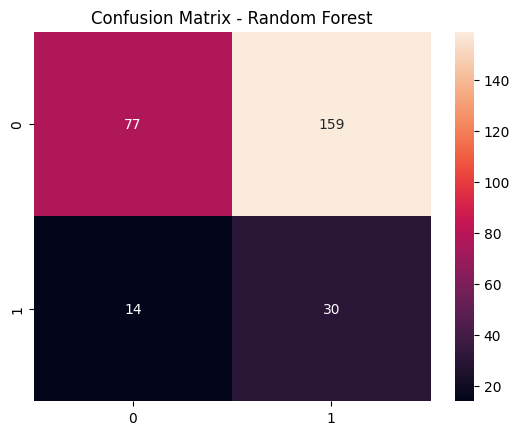

In [68]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.title('Confusion Matrix - Random Forest');

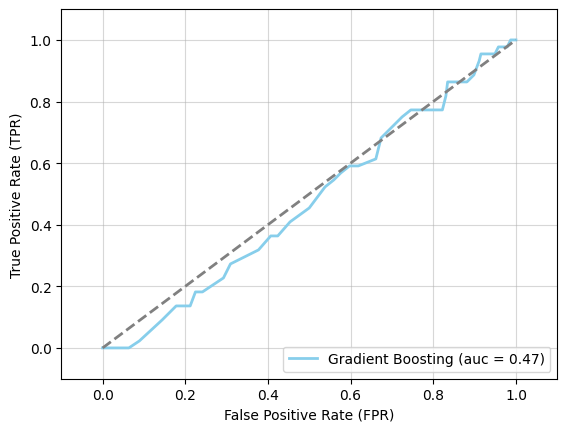

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'Gradient Boosting (auc = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

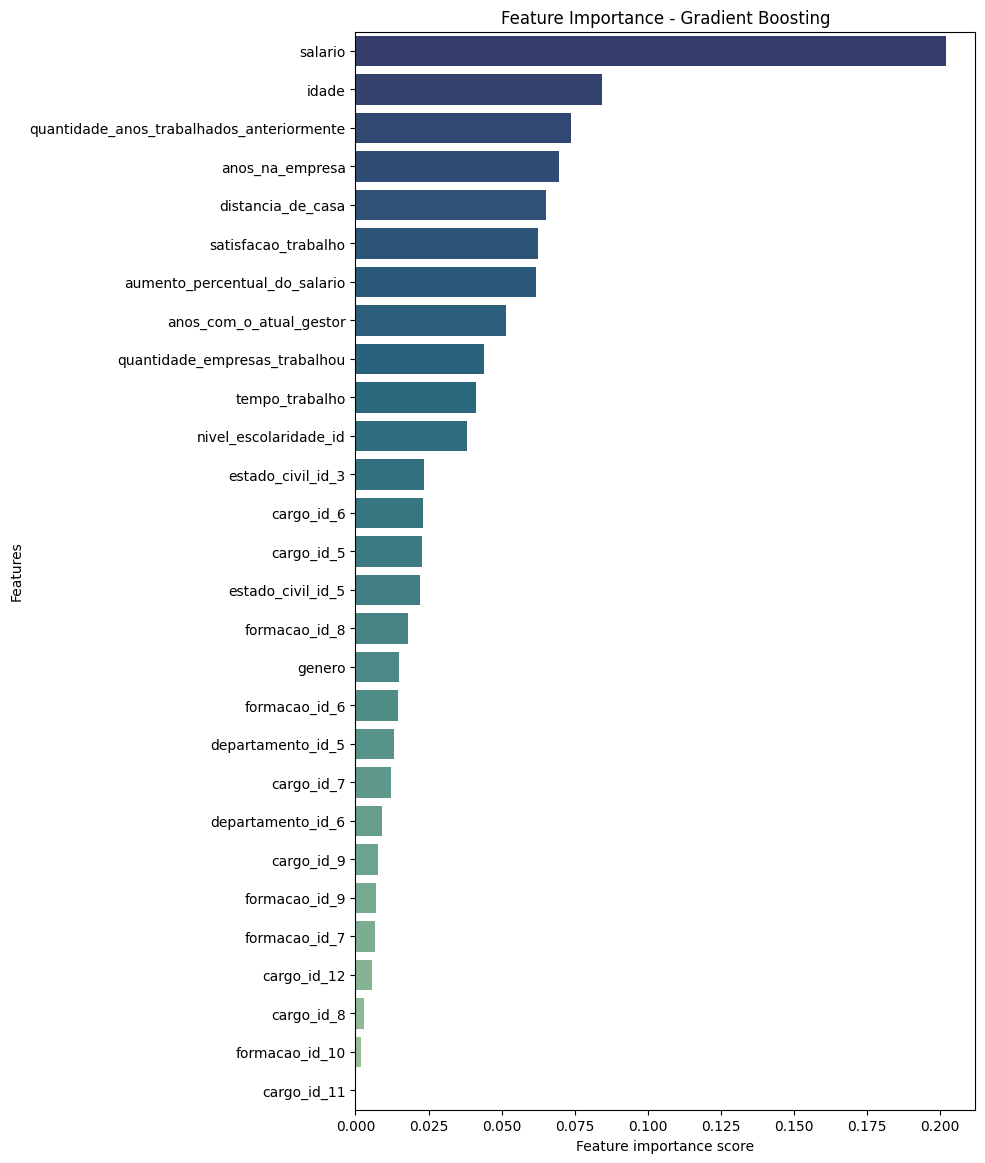

In [70]:
feature_scores = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(8, 14))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, palette='crest_r')
ax.set_title("Feature Importance - Gradient Boosting")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [71]:
feature_scores.head(5)

,0
salario,0.201937
idade,0.084236
quantidade_anos_trabalhados_anteriormente,0.073900
anos_na_empresa,0.069559
distancia_de_casa,0.065222
